# Heart Diesease Predictor
The goal of the model is to predict wether the patient has a heart diesease based on numeral description of his physical and psychological state. 

Goals:
    - Properly describe the code
    - Use ensemble learning
    - Use heavy cross-validation
    
    
Feature description:
### age
age in years

### sex
(1 = male; 0 = female)

### cp
chest pain type

### trestbps
resting blood pressure (in mm Hg on admission to the hospital)

### chol
serum cholestoral in mg/dl

### fbs
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

### restecg
resting electrocardiographic results

### thalach
maximum heart rate achieved

### exang
exercise induced angina (1 = yes; 0 = no)

### oldpeak
ST depression induced by exercise relative to rest

### slope
the slope of the peak exercise ST segment

### ca
number of major vessels (0-3) colored by flourosopy

### thal
3 = normal; 6 = fixed defect; 7 = reversable defect

### target
1 or 0 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
plt.style.use('seaborn-dark')

import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

data   = pd.read_csv('../input/heart.csv')
labels = data['target']

In [21]:
def quartile_probs(frame, metric, target_metric):
    first  = frame[frame[metric] <= frame.describe()[metric][4]]
    second = frame[(frame[metric] > frame.describe()[metric][4]) & (frame[metric] <= frame.describe()[metric][5])]
    third  = frame[(frame[metric] > frame.describe()[metric][5]) & (frame[metric] <= frame.describe()[metric][6])]
    fourth = frame[(frame[metric] > frame.describe()[metric][6]) & (frame[metric] <= frame.describe()[metric][7])]
    
    one_q_prob = first[first[target_metric] == 1].count()[target_metric] / first[target_metric].count()
    two_q_prob = second[second[target_metric] == 1].count()[target_metric] / second[target_metric].count()
    three_q_prob = third[third[target_metric] == 1].count()[target_metric] / third[target_metric].count()
    four_q_prob = fourth[fourth[target_metric] == 1].count()[target_metric] / fourth[target_metric].count()
    
    labels   = ['1Q \n n = '+str(first[target_metric].count()),
                '2Q \n n = '+str(second[target_metric].count()), 
                '3Q \n n = '+str(third[target_metric].count()), 
                '4Q \n n = '+str(fourth[target_metric].count())]
    problist = [one_q_prob, two_q_prob, three_q_prob, four_q_prob]
    
    print('1Q {} prob: {:.2f}% (n = {})'.format(metric, one_q_prob*100, first[target_metric].count()))
    print('2Q {} prob: {:.2f}% (n = {})'.format(metric, two_q_prob*100, second[target_metric].count()))
    print('3Q {} prob: {:.2f}% (n = {})'.format(metric, three_q_prob*100, third[target_metric].count()))
    print('4Q {} prob: {:.2f}% (n = {})'.format(metric, four_q_prob*100, fourth[target_metric].count()))
    
    sns.barplot(labels, problist)
    
def class_probs(frame, metric, target_metric):
    results = []
    for i in frame[metric].unique():
        subset = data[data[metric] == i]
        pct = subset[target_metric][subset[target_metric] == 1].count()/subset[target_metric].count()
        results.append([str(i), pct, subset[target_metric].count()])
        
    for i in results:
        print("Probability for {}: {:.2f}% (n = {})".format(i[0], i[1]*100, i[2]))       
    
    sns.barplot([x[0] for x in results], [x[1] for x in results]);

## EDA

In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Age Analysis

1Q age prob: 72.37% (n = 76)
2Q age prob: 63.16% (n = 76)
3Q age prob: 35.00% (n = 80)
4Q age prob: 47.89% (n = 71)


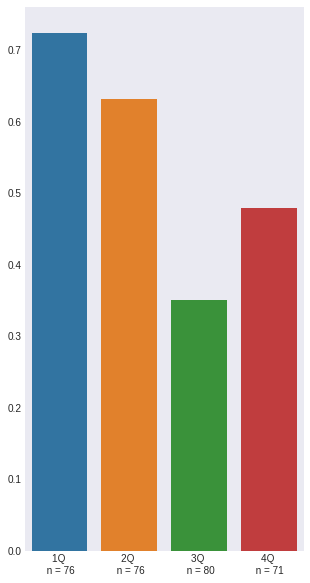

In [25]:
 quartile_probs(data, 'age', 'target')

First conclussions are interesting: younger people in the sample are generally less likely to have a heart diesease. The lowest probability in sample is however for the third quartile (55-61).

# Sex Analysis

Probability for 1: 44.93% (n = 207)
Probability for 0: 75.00% (n = 96)


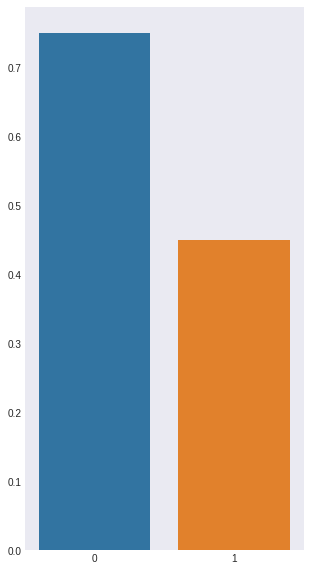

In [26]:
 class_probs(data, 'sex', 'target')

It also appears that women are twice as likely to have a heart diesease.

# Chest Pain Analysis

Probability for 3: 69.57% (n = 23)
Probability for 2: 79.31% (n = 87)
Probability for 1: 82.00% (n = 50)
Probability for 0: 27.27% (n = 143)


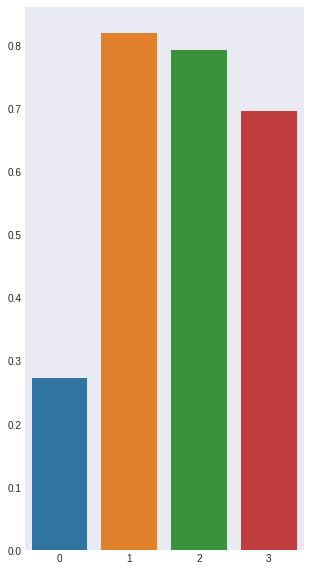

In [27]:
 class_probs(data, 'cp', 'target')

Whenever Atypical Angina or non-anginal pain occurs, there is a very high risk of heart diesease. The same goes for asymptomatic cases, however the sample for those is quite low, so our estimation should be most troublesome for asymptomatic cases and for Typical Angina cases, where the sample is relatively high.  

# Resting BPM Analysis

1Q trestbps prob: 61.86% (n = 97)
2Q trestbps prob: 54.05% (n = 74)
3Q trestbps prob: 56.72% (n = 67)
4Q trestbps prob: 41.54% (n = 65)


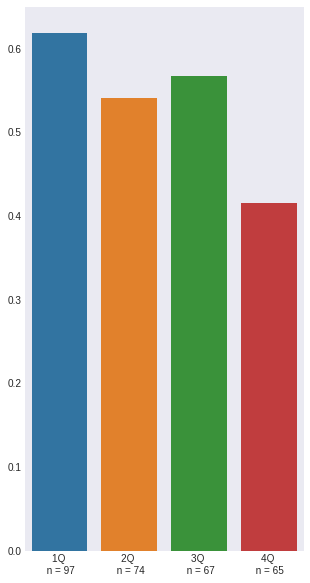

In [28]:
 quartile_probs(data, 'trestbps', 'target')

Resting BPM does not seem very relevant as a sole determiner. Lower probability for 4Q is likely a random walk.

# Choresterol Analysis

1Q chol prob: 62.82% (n = 78)
2Q chol prob: 59.46% (n = 74)
3Q chol prob: 52.00% (n = 75)
4Q chol prob: 43.42% (n = 76)


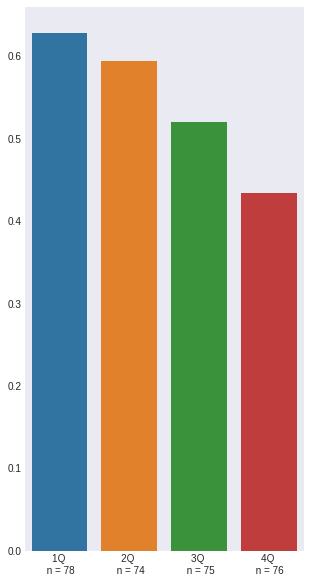

In [29]:
 quartile_probs(data, 'chol', 'target')

Probability of heart diesease appears to be falling in a stable manner as serum choresteral leves increase. What is also worth noticing is amazingly even distributon of n's among the quartiles.

# Blood Sugar Analysis

Probability for 1: 51.11% (n = 45)
Probability for 0: 55.04% (n = 258)


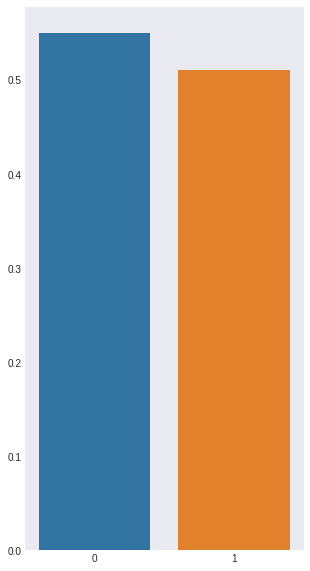

In [30]:
 class_probs(data, 'fbs', 'target')

Blood sugar does not seem to be relevant as a sole determiner.

# Resting electrocardiographic results Analysis

Probability for 0: 46.26% (n = 147)
Probability for 1: 63.16% (n = 152)
Probability for 2: 25.00% (n = 4)


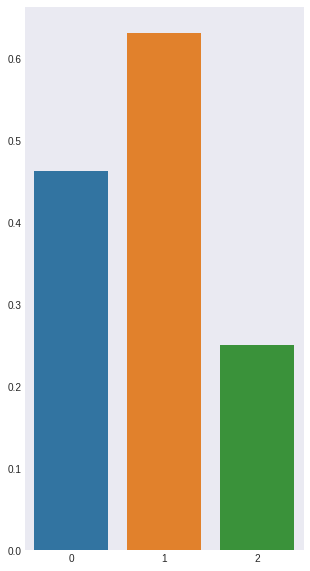

In [31]:
 class_probs(data, 'restecg', 'target')

Samples with type 1 score seem to have higher risk of diesease than those with type 0. No conclussions should be made with regard to type 2, as there were only 4 samples in this category.

1Q thalach prob: 26.32% (n = 76)
2Q thalach prob: 47.44% (n = 78)
3Q thalach prob: 63.51% (n = 74)
4Q thalach prob: 81.33% (n = 75)


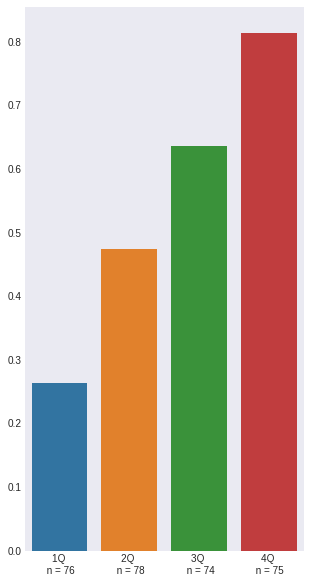

In [32]:
 quartile_probs(data, 'thalach', 'target')

Highly significant and useful feature. The probability seems to be rising in an almost ideally linear manner, and the distribution of samples is almost perfectly even.

# Exercise Induced Angina Analysis

Probability for 0: 69.61% (n = 204)
Probability for 1: 23.23% (n = 99)


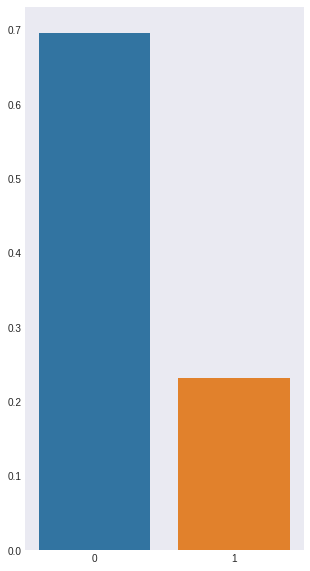

In [33]:
 class_probs(data, 'exang', 'target')

Those who experienced EIA are much less likely to actually have a heart diesease.

# ST Depression Analysis

1Q oldpeak prob: 74.75% (n = 99)
2Q oldpeak prob: 70.31% (n = 64)
3Q oldpeak prob: 48.48% (n = 66)
4Q oldpeak prob: 18.92% (n = 74)


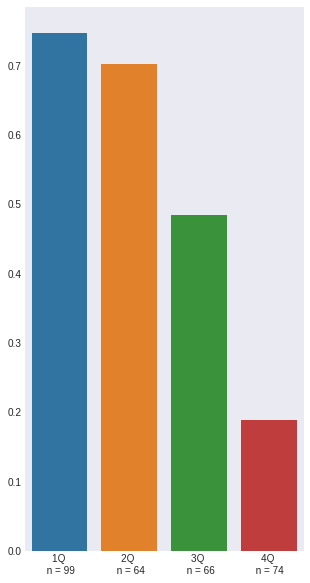

In [34]:
 quartile_probs(data, 'oldpeak', 'target')

The higher the ST depression value, the less likely it is to have a heart diesease

# ST Slope Analysis

Probability for 0: 42.86% (n = 21)
Probability for 2: 75.35% (n = 142)
Probability for 1: 35.00% (n = 140)


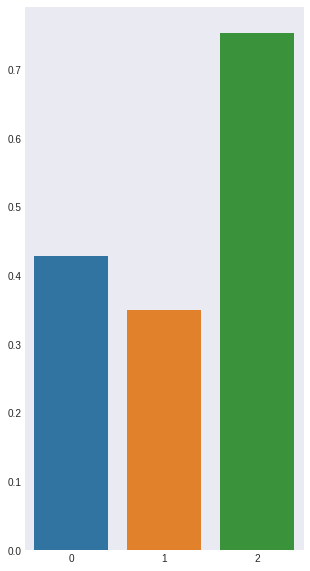

In [35]:
 class_probs(data, 'slope', 'target')

It seems that only slope 2 has significant influence over the diesease prob.

# Fluoroscopy Analysis

Probability for 0: 74.29% (n = 175)
Probability for 2: 18.42% (n = 38)
Probability for 1: 32.31% (n = 65)
Probability for 3: 15.00% (n = 20)
Probability for 4: 80.00% (n = 5)


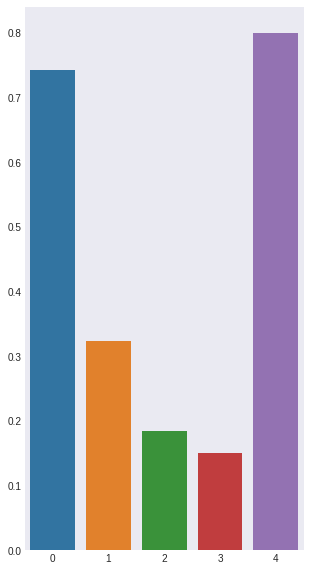

In [36]:
 class_probs(data, 'ca', 'target')

Type 4 should be disregarded, as n=5, therefore, we can conclude that the coorelation is inverse.

# Thal Analysis

Probability for 1: 33.33% (n = 18)
Probability for 2: 78.31% (n = 166)
Probability for 3: 23.93% (n = 117)
Probability for 0: 50.00% (n = 2)


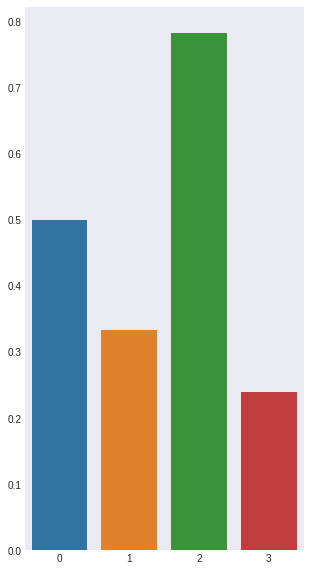

In [37]:
 class_probs(data, 'thal', 'target')

It appears that only thal 2 has a significant influence over the diesease.

# Dropping Irrelevant Data

In [38]:
data = data.drop(['fbs', 'trestbps'], axis = 1)

# Machine Learning Model

In [41]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [42]:
x = data
y = labels

In [53]:
d = {'Gaussian Process': [], 
     'Random Forest': [], 
     'K Neighbours': [], 
     'SVC': [], 
     'Logit': []}

scores = pd.DataFrame(data = d)

In [54]:
def validate(rs):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = rs)
    
    GPC = GaussianProcessClassifier()
    GPC.fit(x_train, y_train)
    GPC.score(x_test, y_test)

    RFC = RandomForestClassifier(n_estimators = 10)
    RFC.fit(x_train, y_train)
    RFC.score(x_test, y_test)

    KNC = KNeighborsClassifier()
    KNC.fit(x_train, y_train)
    KNC.score(x_test, y_test)
    
    SVC1 = SVC()
    SVC1.fit(x_train, y_train)
    SVC1.score(x_test, y_test)
    
    LOGIT = LogisticRegression()
    LOGIT.fit(x_train, y_train)
    LOGIT.score(x_test, y_test)
    
    tempr = pd.DataFrame([[GPC.score(x_test, y_test), 
                        RFC.score(x_test, y_test),
                        KNC.score(x_test, y_test),
                        SVC1.score(x_test, y_test),
                        LOGIT.score(x_test, y_test)]], columns=['Gaussian Process',
                                                                  'Random Forest',
                                                                  'K Neighbours',
                                                                  'SVC',
                                                                  'Logit'])
                         
    return tempr

In [55]:
for rs in np.random.randint(100_000, size = 1000):
    scores = scores.append(validate(rs))

In [56]:
scores.mean()

Gaussian Process    0.609607
Random Forest       0.997885
K Neighbours        0.647918
SVC                 0.545984
Logit               1.000000
dtype: float64

In [57]:
logit_success_rate  = scores[scores['Logit'] == 1.0]['Logit'].count() / scores['Logit'].count()
print(' {:.2f} %'.format(logit_success_rate*100))

 100.00 %


### In 1000 randomly generated 0.2 splits, the logistic regression classifier has achieved 100% success rate. Not much else to be done here....